In [1]:
import numpy
import scipy.optimize
import random
import string
from math import exp
from math import log
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def parseData(fname):
  for l in open(fname):
    yield eval(l)

print ("Reading data...")
data = list(parseData("beer_50000.json"))
print ("done")

Reading data...
done


In [2]:
# Define the words
words = ["lactic", "tart", "sour", "citric", "sweet", "acid", "hop", "fruit", "salt", "spicy"]

# Getting the word counts
def feature(datum):
  counts = [0]*len(words)
  mystring = datum['review/text']
  mystring = mystring.translate(str.maketrans('','',string.punctuation))
  mywords = mystring.split()
  for i in range (0, len(mywords)):
    for j in range (0, len(words)):
      if mywords[i].lower() == words[j]:
        counts[j] += 1
  feat = counts
  return feat

X = [feature(d) for d in data]

In [3]:
# Problem 6

# Splitting into thirds
one_third = int(len(X)/3)
two_third = 2*one_third

X_training_set = X[:one_third]
X_validation_set = X[one_third:two_third]
X_test_set = X[two_third:]

In [4]:
pca = PCA(n_components=10)
pca.fit(X_training_set)
print (pca.components_)

[[ -5.99348611e-04   3.95180460e-03  -9.30313126e-03   9.77013461e-03
    7.99743141e-01  -1.15982082e-04   5.94935746e-01   7.26421070e-02
    1.73560182e-04   3.14239951e-02]
 [ -1.57703251e-03  -8.65486079e-03  -1.41729712e-02   1.36618507e-02
   -5.96957130e-01   2.48551765e-04   8.01904848e-01  -3.25375266e-03
   -1.24914732e-03   1.06619909e-02]
 [  4.00311919e-03   4.43650130e-02   9.06341269e-02   3.63555020e-03
   -6.10090802e-02  -2.42559237e-04  -3.98261666e-02   9.91605188e-01
    3.81500215e-04   3.46218809e-02]
 [ -4.26440126e-04   2.28634173e-02  -1.25300143e-02   1.95012054e-02
   -1.68370978e-02  -1.59706556e-04  -2.62603663e-02  -3.68946765e-02
    2.69012381e-03   9.98297656e-01]
 [  2.60661794e-02   2.24900160e-01   9.68807960e-01   3.42563694e-03
    3.00250324e-03   9.49375889e-03   2.13269955e-02  -9.78249427e-02
    7.56407137e-04   3.94909560e-03]
 [  3.22021761e-02   9.72157312e-01  -2.28841275e-01   1.09560490e-02
   -6.07572126e-03   1.00261862e-02   2.06999

In [17]:
# Problem 7

pca = PCA(n_components=2)
pca.fit(X_training_set)

X_orig = X_training_set
X_hat = pca.inverse_transform(pca.transform(X_orig))
total = 0
for i in range (0,len(X_hat)):
    dist = (numpy.linalg.norm(X_hat[i] - X_orig[i]))**2
    total += dist
print (total)
print (total/len(X_hat))
print (len(X_hat))
mse = ((X_hat - X_orig)**2).mean(axis=None)
print (mse)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_hat, X_orig)
print (mse)

7916.56725741
0.475013035966
16666
0.0475013035966
0.0475013035966


In [8]:
Xn = numpy.matrix(X_training_set)

pca = PCA()
pca.fit(Xn)

print(pca.components_)

##################################################
# Replace points by their mean                   #
##################################################

print("Reconstruction error when replacing points by the mean of the corresponding coordinate:")
print(numpy.linalg.norm(Xn - Xn.mean(0))**2) 

##################################################
# Reconstruction error with two dimensions      #
##################################################

Yn = Xn*pca.components_.T

print("First transformed data point " + str(Yn[0]))

yVar = numpy.var(Yn,0)
print("Reconstruction error in the new basis:")
print(len(Yn) * sum(yVar.tolist()[0][2:])) # Reconstruction error

[[ -5.99348611e-04   3.95180460e-03  -9.30313126e-03   9.77013461e-03
    7.99743141e-01  -1.15982082e-04   5.94935746e-01   7.26421070e-02
    1.73560182e-04   3.14239951e-02]
 [ -1.57703251e-03  -8.65486079e-03  -1.41729712e-02   1.36618507e-02
   -5.96957130e-01   2.48551765e-04   8.01904848e-01  -3.25375266e-03
   -1.24914732e-03   1.06619909e-02]
 [  4.00311919e-03   4.43650130e-02   9.06341269e-02   3.63555020e-03
   -6.10090802e-02  -2.42559237e-04  -3.98261666e-02   9.91605188e-01
    3.81500215e-04   3.46218809e-02]
 [ -4.26440126e-04   2.28634173e-02  -1.25300143e-02   1.95012054e-02
   -1.68370978e-02  -1.59706556e-04  -2.62603663e-02  -3.68946765e-02
    2.69012381e-03   9.98297656e-01]
 [  2.60661794e-02   2.24900160e-01   9.68807960e-01   3.42563694e-03
    3.00250324e-03   9.49375889e-03   2.13269955e-02  -9.78249427e-02
    7.56407137e-04   3.94909560e-03]
 [  3.22021761e-02   9.72157312e-01  -2.28841275e-01   1.09560490e-02
   -6.07572126e-03   1.00261862e-02   2.06999

Progress: 0.0
Progress: 0.06000240009600384
Progress: 0.12000480019200768
Progress: 0.1800072002880115
Progress: 0.24000960038401536
Progress: 0.3000120004800192
Progress: 0.360014400576023
Progress: 0.4200168006720269
Progress: 0.48001920076803073
Progress: 0.5400216008640346
Progress: 0.6000240009600384
Progress: 0.6600264010560423
Progress: 0.720028801152046
Progress: 0.7800312012480499
Progress: 0.8400336013440538
Progress: 0.9000360014400576
Progress: 0.9600384015360615


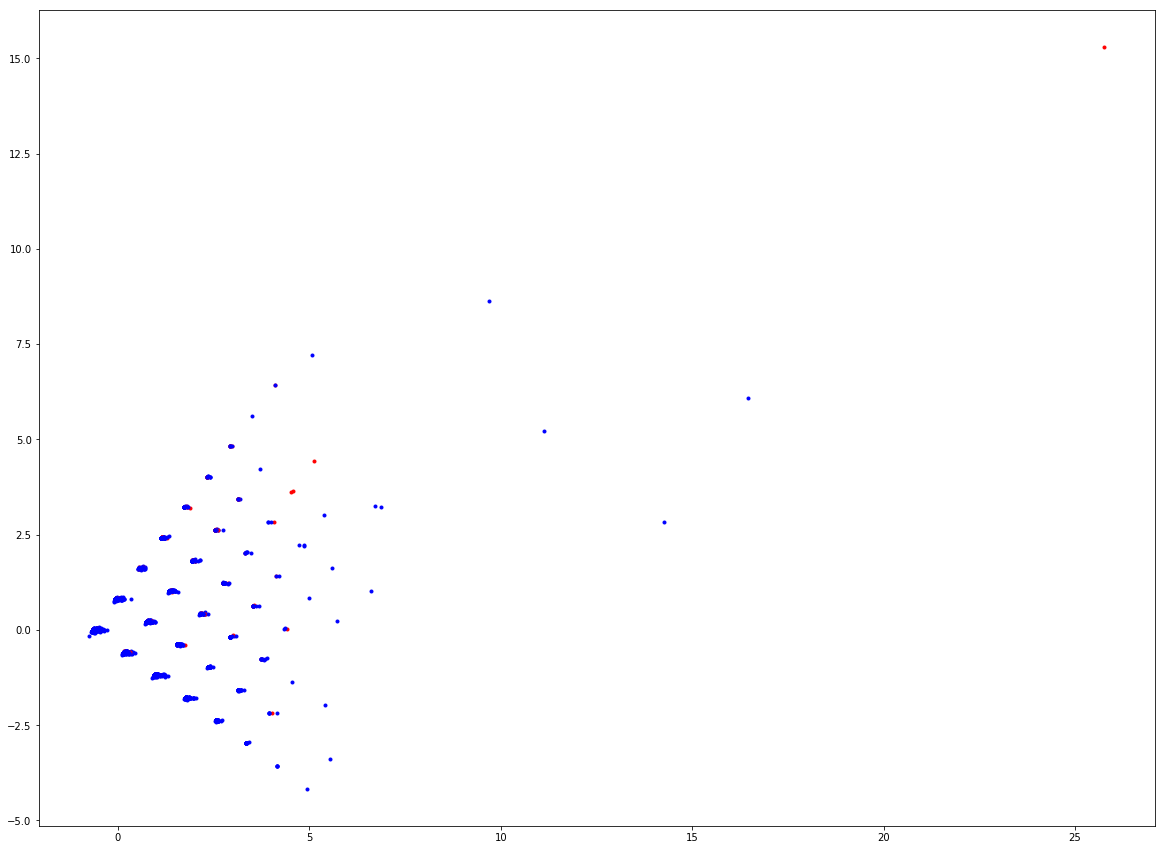

In [7]:
# Problem 8

y = [d["beer/style"] == "American IPA" for d in data]

X_new = pca.transform(X_orig)

for i in range (0, len(X_new)):
  if y[i]:
    plt.plot(X_new[i][0], X_new[i][1], marker=".", color="red")
  else:
    plt.plot(X_new[i][0], X_new[i][1], marker=".", color="blue")
  if i % 1000 == 0:
    print ("Progress: " + str(i/len(X_new)))
fig_size = [20,15]
plt.rcParams["figure.figsize"] = fig_size
plt.show()